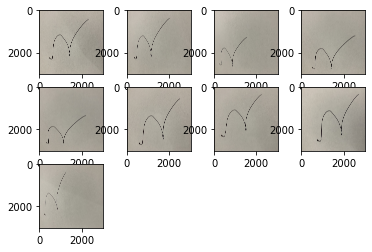

In [1]:
from matplotlib import pyplot
from matplotlib.image import imread
%matplotlib inline
folder = 'E:/ED project/bengali/train/'

for i in range(1,10):
    pyplot.subplot(340 + i)
    filename = folder + '2(' + str(i) + ').JPG'
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

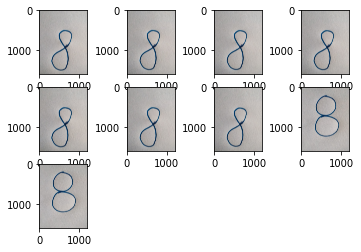

In [2]:

for i in range(1,10):
    pyplot.subplot(340 + i)
    filename = folder + '4 (' + str(i+100) + ').JPG'
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

## Making a different subdirectory for the different characteres


In [3]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

dataset_home = 'E:/ED project/classfier-bengali/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['1/','2/','3', '4/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'E:/ED project/bengali/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('1'):
        dst = dataset_home + dst_dir + '1/'  + file
        copyfile(src, dst)
    if file.startswith('2'):
        dst = dataset_home + dst_dir + '2/'  + file
        copyfile(src, dst)
    if file.startswith('3'):
        dst = dataset_home + dst_dir + '3/'  + file
        copyfile(src, dst)
    elif file.startswith('4'):
        dst = dataset_home + dst_dir + '4/'  + file
        copyfile(src, dst)

## Making the model

Found 912 images belonging to 4 classes.
Found 356 images belonging to 4 classes.
Epoch 1/5
57/57 [==============================] - 58s 1s/step - loss: 1.9087 - accuracy: 0.5464 - val_loss: 0.1506 - val_accuracy: 0.9466
Epoch 2/5
57/57 [==============================] - 59s 1s/step - loss: 0.0988 - accuracy: 0.9739 - val_loss: 0.1410 - val_accuracy: 0.9382
Epoch 3/5
57/57 [==============================] - 58s 1s/step - loss: 0.0504 - accuracy: 0.9910 - val_loss: 0.0235 - val_accuracy: 0.9944
Epoch 4/5
57/57 [==============================] - 58s 1s/step - loss: 0.0132 - accuracy: 0.9990 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 5/5
57/57 [==============================] - 58s 1s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
100.0


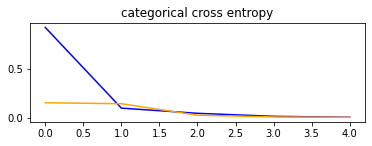

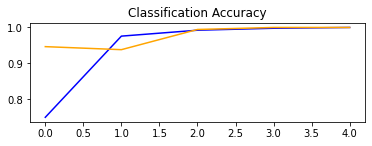

In [5]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator



def define_model():
    model = Sequential()
    model.add(Conv2D(56, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(100, 100, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


def summarize_diagnostics(history):
    %matplotlib inline
    
    pyplot.subplot(211)
    pyplot.title('categorical cross entropy')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.show()  
    
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
    
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

def run_test_harness():
    
    model = define_model()
    
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    
    train_it = datagen.flow_from_directory('E:/ED project/classfier-bengali/train/',
                                           class_mode = 'categorical',
     batch_size=16, target_size=(100, 100))
    test_it = datagen.flow_from_directory('E:/ED project/classfier-bengali/test/',
                                          class_mode = 'categorical', 
         batch_size=16, target_size=(100, 100))

    history = model.fit(train_it,batch_size = 16,
        validation_data=test_it, epochs=5)
    
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print(acc * 100.0)
    
    summarize_diagnostics(history)
    model.save("final_model_bengali(2).h5")

    
run_test_harness()